In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import os


In [ ]:
TITANIC_PATH = ''

In [ ]:
def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [ ]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


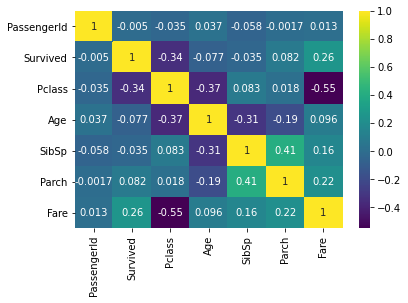

In [ ]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)

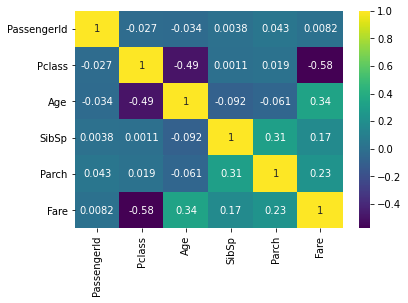

In [ ]:
sns.heatmap(test_data.corr(), cmap='viridis', annot=True)

In [52]:
data = pd.concat([train_data, test_data])
data.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
0              1       0.0       3  ...    7.2500   NaN         S
1              2       1.0       1  ...   71.2833   C85         C
2              3       1.0       3  ...    7.9250   NaN         S
3              4       1.0       1  ...   53.1000  C123         S
4              5       0.0       3  ...    8.0500   NaN         S
..           ...       ...     ...  ...       ...   ...       ...
413         1305       NaN       3  ...    8.0500   NaN         S
414         1306       NaN       1  ...  108.9000  C105         C
415         1307       NaN       3  ...    7.2500   NaN         S
416         1308       NaN       3  ...    8.0500   NaN         S
417         1309       NaN       3  ...   22.3583   NaN         C

[1309 rows x 12 columns]>

In [53]:
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [54]:
import re

In [56]:
set([re.sub('\d', '', v) for v in data['Cabin'].unique() if type(v) == str])

{'A',
 'B',
 'B B',
 'B B B',
 'B B B B',
 'C',
 'C C',
 'C C C',
 'D',
 'D D',
 'E',
 'E E',
 'F',
 'F E',
 'F G',
 'G',
 'T'}

In [57]:
data['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [58]:
set([re.sub('\d', '', v) for v in data['Ticket'].unique() if type(v) == str])

{'',
 'A. ',
 'A. . ',
 'A.. ',
 'A./. ',
 'A/ ',
 'A/. ',
 'A/S ',
 'AQ/ ',
 'AQ/. ',
 'C ',
 'C.A. ',
 'C.A./SOTON ',
 'CA ',
 'CA. ',
 'F.C. ',
 'F.C.C. ',
 'Fa ',
 'LINE',
 'LP ',
 'P/PP ',
 'PC ',
 'PP ',
 'S.C./A.. ',
 'S.C./PARIS ',
 'S.O./P.P. ',
 'S.O.C. ',
 'S.O.P. ',
 'S.P. ',
 'S.W./PP ',
 'SC ',
 'SC/A ',
 'SC/A. ',
 'SC/AH ',
 'SC/AH Basle ',
 'SC/PARIS ',
 'SC/Paris ',
 'SCO/W ',
 'SO/C ',
 'SOTON/O ',
 'SOTON/O.Q. ',
 'SOTON/OQ ',
 'STON/O . ',
 'STON/O. ',
 'STON/OQ. ',
 'SW/PP ',
 'W./C. ',
 'W.E.P. ',
 'W/C ',
 'WE/P '}

In [75]:
set([v for v in data['Name'] if '.' in v])

{'Mineff, Mr. Ivan',
 'Hagland, Mr. Konrad Mathias Reiersen',
 'Wick, Mrs. George Dennick (Mary Hitchcock)',
 'McGowan, Miss. Katherine',
 'Mahon, Miss. Bridget Delia',
 'Portaluppi, Mr. Emilio Ilario Giuseppe',
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
 'Renouf, Mrs. Peter Henry (Lillian Jefferys)',
 'Christmann, Mr. Emil',
 'Harbeck, Mr. William H',
 'Andersen, Mr. Albert Karvin',
 'Brobeck, Mr. Karl Rudolf',
 'Berglund, Mr. Karl Ivar Sven',
 'Larsson-Rondberg, Mr. Edvard A',
 'Barkworth, Mr. Algernon Henry Wilson',
 'Thayer, Mrs. John Borland (Marian Longstreth Morris)',
 'Baclini, Mrs. Solomon (Latifa Qurban)',
 'Dean, Mr. Bertram Frank',
 'Nicholson, Mr. Arthur Ernest',
 'Andreasson, Mr. Paul Edvin',
 'Hegarty, Miss. Hanora "Nora"',
 'Cor, Mr. Ivan',
 'Bonnell, Miss. Caroline',
 'Pettersson, Miss. Ellen Natalia',
 'Nosworthy, Mr. Richard Cater',
 'Van Impe, Mrs. Jean Baptiste (Rosalie Paula Govaert)',
 'Clark, Mrs. Walter Miller (Virginia McDowell)',
 'Bentham, Miss. Lilian

In [78]:
train_data['NameParts'] = [len(v.split(' ')) for v in train_data['Name']]
train_data['NameParts'][:5]

0    4
1    7
2    3
3    7
4    4
Name: NameParts, dtype: int64

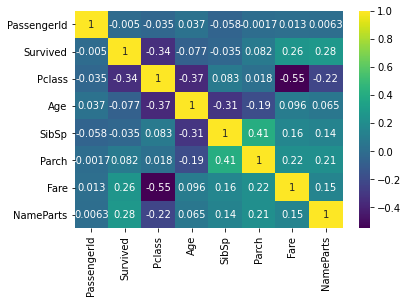

In [81]:
sns.heatmap(train_data.corr(), cmap='viridis', annot=True)